# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

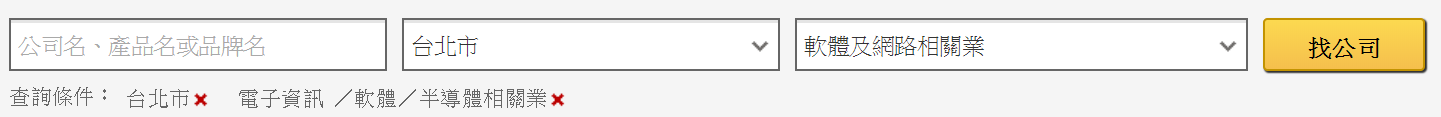

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
#job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&area=6001006000&indcat=1012001001,1006000000&order=1&mode=s&jobsource=checkc"
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000"

### 開始爬取搜尋結果

In [3]:
browser = webdriver.Chrome()
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

In [4]:
html = browser.page_source
soup = BeautifulSoup(html, 'lxml')

In [5]:
total_no = soup.find('div', id='search-result').find('div', class_='display').find('span', class_='total').find('span').text
print("total record:", total_no)

total record: 211


In [6]:
x = soup.find_all('a', class_="page-next")
print(len(x), x)
btn_next = browser.find_element_by_class_name("page-next")
print(btn_next)

1 [<a class="page-next" href="/cust/list/index?page=2&amp;area=6001001000&amp;indcat=1001002000&amp;order=1&amp;mode=s&amp;jobsource=checkc">下一頁</a>]
<selenium.webdriver.remote.webelement.WebElement (session="d3370955520db49fa92245d070d5745c", element="a7394424-ad5b-4368-90ea-43b0bd5165b9")>


In [7]:
x = soup.find_all('a', class_="page-num active")
print(len(x), x)
page_current = soup.find('a', attrs={'class':"page-num active"})['data-value']
print(page_current)

1 [<a class="page-num active" data-value="1" href="/cust/list/index?page=1&amp;area=6001001000&amp;indcat=1001002000&amp;order=1&amp;mode=s&amp;jobsource=checkc">1</a>]
1


In [8]:
x = soup.find_all('div', class_="page-total")
print(len(x), x)
page_total = soup.find("div", attrs={'class':"page-total"})['data-total']
print("total page:", page_total)

1 [<div class="page-total" data-total="8">共 8 頁</div>]
total page: 8


In [9]:
while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    page_current = soup.find('a', attrs={'class':"page-num active"})['data-value']
    print("%2s/%s" % (page_current, page_total), end=" ")
    print("r", end="")
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()
        print('w', end="")
    
    

    if int(page_current) == int(page_total):
        print("[End]")
        break
    
    print("")
    btn_next = browser.find_element_by_class_name("page-next")
    btn_next.click()

 1/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 2/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 3/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 4/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 5/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 6/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 7/8 rwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
 8/8 rw[End]


In [10]:
# 關閉瀏覽器
browser.quit();